In [1]:
# import required dependecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
# Set display options
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [3]:
# Read in the data
employees = pd.read_csv('./Attrition_Rate_Prediction/Dataset/Train.csv')

In [4]:
# Create a copy of the dataframe
copy_employees = employees.copy()

In [5]:
employees.head(5)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [8]:
employees[employees['Time_of_service'] == 0].shape[0]

162

In [9]:
employees['Relationship_Status'].unique()

array(['Married', 'Single'], dtype=object)

#### Observations
* Travel_Rate should range from 1-3 but there seems to be 0 in the data
* There are null values in the data

### Exploratory Data Analysis

#### Data Cleaning and preliminary EDA

In [10]:
# Check for null values
pd.isnull(employees).sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

#### Columns with null values
* Age
* Time of service
* Var2
* Var4

In [11]:
# Drop irrelevant columns i.e. Employee_ID. Doesn help us in the analysis
employees.drop("Employee_ID", axis=1, inplace=True)

In [12]:
employees.head(1)

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841


In [13]:
# Check on the data types in each column
employees.dtypes

Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
dtype: object

In [14]:
# Check for duplicated entries/ observations in the data
employees[employees.duplicated(keep='first')]

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate


In [15]:
# Get some statistical summary on the data
employees.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


#### Observations:
* There seems to be a good number of categorical variables in the data in numerical format


* **Continuous variables:** Time_of_service, Time_since_promotion, growth_rate, VAR2, VAR3, 


* **Categorical variables:** Age, Education_Level, Travel_Rate, Post_Level, Pay_Scale, Work_Life_Balance, VAR1, VAR4, VAR5, VAR6, VAR7


In [16]:
pd.isnull(employees).sum()

Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

#### Create imputers for the null values and combine them with the column transformer

In [17]:
# Impute the null values
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer


continuous_imputer= SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

continuous_cols = ["Age", "Time_of_service", "VAR2"]
categorical_cols = ["Pay_Scale", "Work_Life_balance", "VAR4"]

employees[continuous_cols] = continuous_imputer.fit_transform(employees[continuous_cols])
employees[categorical_cols] = categorical_imputer.fit_transform(employees[categorical_cols])

In [18]:
categorical_cols

['Pay_Scale', 'Work_Life_balance', 'VAR4']

#### Exploratory Data Analysis

<ipython-input-19-7f49d7de8642>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  employees.hist(ax=ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187451B59D0>,
      dtype=object)

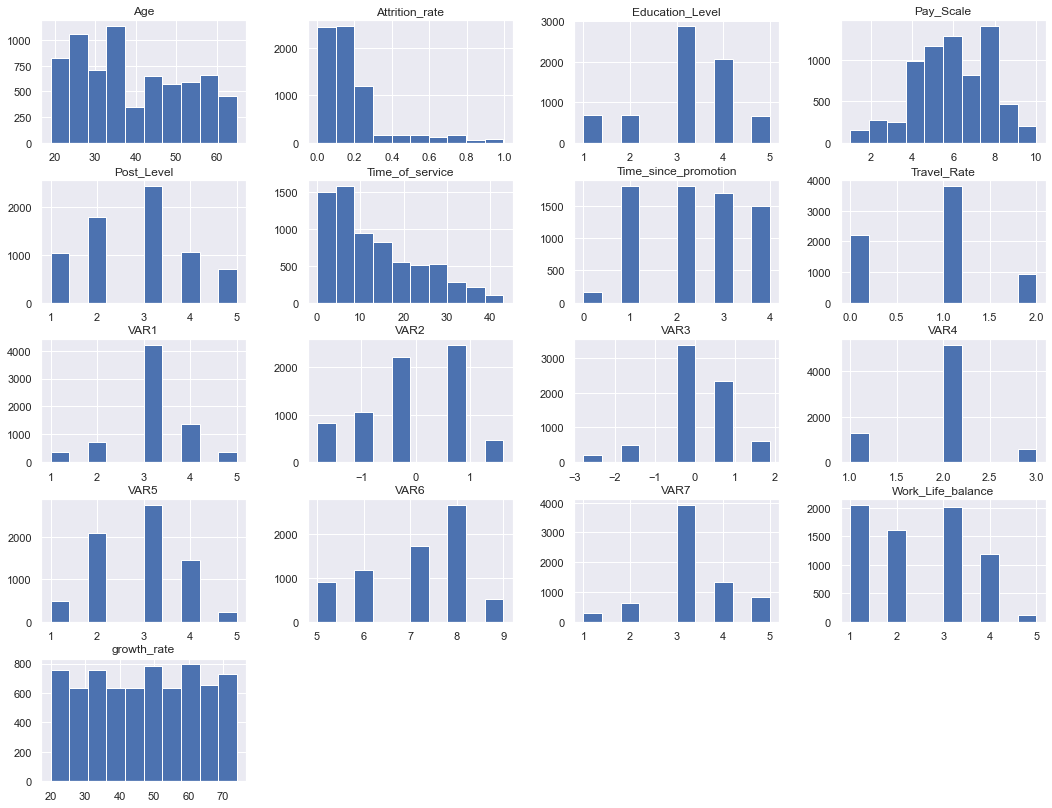

In [19]:
# Check the distribution of the data
fig, ax = plt.subplots(figsize=(18,14))
employees.hist(ax=ax)

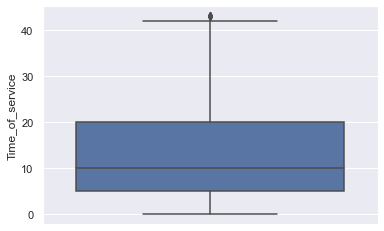

In [20]:
# Check for outliers in Time_of_service and Pay_Scale
sns.boxplot(y='Time_of_service', data=employees)

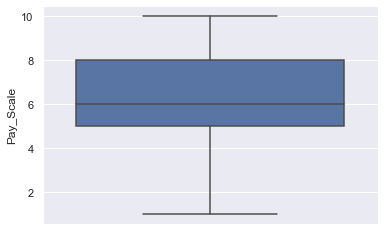

In [21]:
sns.boxplot(y='Pay_Scale', data=employees)

#### Observations:
* Both features have no outliers

#### Check for a relationship between the features and the target (Attrition_Rate)

In [22]:
from ipywidgets import widgets

def plot_feature(feature):
    employees.plot(kind="scatter", x=feature, y='Attrition_rate', alpha=0.4)

cols  = {col : col for col in employees[continuous_cols].columns}

widgets.interact(plot_feature, feature=cols)

interactive(children=(Dropdown(description='feature', options={'Age': 'Age', 'Time_of_service': 'Time_of_servi…

<function __main__.plot_feature(feature)>

#### Observations:
* The doesn't seem to be any direct relationship between the continuous features and the target

#### Continue with data processing and checking the relationships of the data. feature to target and featire to feature. Ensure you have a good understanding of what data type each column falls into for better analysis and processing

In [23]:
employees.corr()['Attrition_rate'].sort_values(ascending=False)

Attrition_rate          1.000000
Work_Life_balance       0.020975
Post_Level              0.016402
growth_rate             0.014247
Time_since_promotion    0.013880
VAR3                    0.001245
VAR6                   -0.003130
VAR5                   -0.004770
VAR1                   -0.008073
Education_Level        -0.008143
Travel_Rate            -0.012608
VAR4                   -0.013364
Age                    -0.014760
Pay_Scale              -0.015043
VAR7                   -0.015299
Time_of_service        -0.017203
VAR2                   -0.022751
Name: Attrition_rate, dtype: float64

#### Observation:
* There's minimal linear correlation between the between the features and the target

#### Check how features correlate to each other

In [24]:
employees.corr()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Age,1.000000,-0.005370,0.880620,0.140875,0.001430,0.011663,0.001360,0.012007,0.003275,0.004871,0.005968,0.007420,0.000357,0.000125,-0.001691,0.008218,-0.014760
Education_Level,-0.005370,1.000000,-0.012774,-0.002077,0.002991,-0.017690,0.009986,0.006866,-0.014715,-0.002185,-0.010076,-0.009689,0.004731,0.005444,0.009195,0.012909,-0.008143
Time_of_service,0.880620,-0.012774,1.000000,0.134779,-0.004045,0.003825,-0.001817,0.019844,-0.002894,0.004664,0.003345,0.006551,-0.005595,0.003412,0.007032,0.006354,-0.017203
Time_since_promotion,0.140875,-0.002077,0.134779,1.000000,0.014147,-0.012061,-0.008851,-0.010011,-0.007557,-0.002873,0.004133,-0.002783,-0.003029,0.000563,0.017264,0.005173,0.013880
growth_rate,0.001430,0.002991,-0.004045,0.014147,1.000000,0.008460,-0.006887,-0.004681,-0.017525,0.001351,0.010594,0.010991,0.020005,-0.015122,-0.005860,-0.017993,0.014247
Travel_Rate,0.011663,-0.017690,0.003825,-0.012061,0.008460,1.000000,0.021299,-0.012605,0.004668,0.023898,0.007772,-0.009019,-0.005177,-0.003866,-0.012280,-0.006271,-0.012608
Post_Level,0.001360,0.009986,-0.001817,-0.008851,-0.006887,0.021299,1.000000,0.022817,-0.014931,-0.008458,-0.006379,0.010387,-0.012055,0.013008,0.002765,-0.003397,0.016402
Pay_Scale,0.012007,0.006866,0.019844,-0.010011,-0.004681,-0.012605,0.022817,1.000000,-0.023230,0.010531,0.006304,0.003309,-0.010843,0.017690,-0.011821,0.002330,-0.015043
Work_Life_balance,0.003275,-0.014715,-0.002894,-0.007557,-0.017525,0.004668,-0.014931,-0.023230,1.000000,-0.021770,-0.002601,0.004295,-0.026315,0.021244,0.003882,0.023108,0.020975
VAR1,0.004871,-0.002185,0.004664,-0.002873,0.001351,0.023898,-0.008458,0.010531,-0.021770,1.000000,0.001934,-0.003318,0.001391,0.007904,-0.002771,0.009355,-0.008073


#### Observations:
* Age and Time of service have a very high correlation of 0.9. Assumption is that older employees have worked in the company for a longer period. Also implies that most hires are younger people

* Growth_rate has a weak +ve correlation with VAR4

* Travel rate has a weak +ve correlation with VAR1 Post_level

* Post level has a weak +ve correlation with Pay scale

* Post level has a weak -ve correlation with Worl life balance


### Feature Engineering

#### Encode categorical variables

In [25]:
employees.head(1)

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841


In [26]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ["Gender", "Relationship_Status", "Hometown", "Unit", "Decision_skill_possess", "Compensation_and_Benefits"]

onehot_enc = OneHotEncoder(sparse=False, categories='auto')

for col in cat_cols:
    employees[col] = onehot_enc.fit_transform(employees[col].values.reshape(-1,1))

# encoder_transform = ColumnTransformer([("onehot_enc", onehot_enc, cat_cols)], sparse_threshold=0)

#### Create a growth per anum feature

In [27]:
def new_columns(employees): 
    employees["Growth_per_ServiceYear"] = employees.apply(lambda x: (x["growth_rate"] / 1) if x['Time_of_service'] == 0 else (x["growth_rate"] / x['Time_of_service']), axis=1)
    
    return employees

employees = new_columns(employees)

#### Create interaction features

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
poly = PolynomialFeatures(degree=2, interaction_only=True)

#### Scale the data

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

### Build the Models

#### Split the data into train and test

In [31]:
from sklearn.model_selection import train_test_split

X = employees.drop(["Attrition_rate"], axis=1)
y = employees["Attrition_rate"]

best_features = ['Education_Level', 'Time_since_promotion', 'growth_rate', 'VAR7', 'Post_Level', 'Pay_Scale', 'VAR2', 'Work_Life_balance', 'VAR6', 'Growth_per_ServiceYear']

X = employees[best_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5600, 10), (1400, 10), (5600,), (1400,))

#### Build a pipeline with the tranformations

In [33]:
from sklearn.pipeline import Pipeline

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error

In [35]:
pipe_transform = Pipeline([("scaler", scaler)])

#### Transform X_test

In [36]:
X_test = scaler.fit_transform(X_test)

In [37]:
# X_test = poly.fit_transform(X_test)

#### KNN

In [40]:
knn_params = {}

In [38]:
KNeighborsRegressor?

In [46]:
knn = KNeighborsRegressor(**knn_params)

pipe_knn = Pipeline([("scaler", scaler), ("knn", knn)])
pipe_knn.fit(X_train, y_train)

y_preds = knn.predict(X_test)

score=100*max(0, 1 - mean_squared_error(y_test, y_preds, squared=False))

print(score)

80.05085070462077


### Hyperparameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [39]:
# RandomizedSearchCV?

In [40]:
# KNeighborsRegressor?

#### KNN Tuning

In [43]:
knn_param_grid_randomcv = {"knn__n_neighbors": [3,5,7], 
                  "knn__weights": ["uniform", "distance"],
                  "knn__algorithm": ['ball_tree', 'kd_tree', 'brute'],
                  "knn__leaf_size": [20,30,40],
                  "knn__p": [2,3,4]}

In [44]:
def extract_params(params):
    new_params = {}
    for k,v in params.items():
        new_k = k.split("__")[1]
        new_params[new_k] = v
        
    return new_params

In [45]:
knn_grid_search = RandomizedSearchCV(pipe_knn, 
                           knn_param_grid_randomcv, 
                           scoring="neg_root_mean_squared_error", 
                           n_iter=50,
                           n_jobs=6, 
                           cv=5, 
                           verbose=1)

knn_grid_search.fit(X_train, y_train)

knn_bestparams = knn_grid_search.best_params_
print(knn_bestparams)

knn_params  = extract_params(knn_bestparams)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   37.4s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  2.0min


{'knn__weights': 'uniform', 'knn__p': 3, 'knn__n_neighbors': 7, 'knn__leaf_size': 40, 'knn__algorithm': 'brute'}


[Parallel(n_jobs=6)]: Done 250 out of 250 | elapsed:  2.5min finished


In [45]:
knn_param_grid = {"knn__n_neighbors": [7,9], 
                  "knn__weights": ["uniform", "distance"],
                  "knn__algorithm": ['ball_tree', 'kd_tree', 'brute'],
                  "knn__leaf_size": [30],
                  "knn__p": [3]
                  }

In [46]:
knn_grid_search = GridSearchCV(pipe_knn, 
                           knn_param_grid, 
                           scoring="neg_root_mean_squared_error", 
                           n_jobs=6, 
                           cv=5, 
                           verbose=1)

knn_grid_search.fit(X_train, y_train)

knn_bestparams = knn_grid_search.best_params_
print(knn_bestparams)

knn_params  = extract_params(knn_bestparams)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   22.9s


{'knn__algorithm': 'ball_tree', 'knn__leaf_size': 30, 'knn__n_neighbors': 9, 'knn__p': 3, 'knn__weights': 'uniform'}


[Parallel(n_jobs=6)]: Done  60 out of  60 | elapsed:   41.2s finished


### Feature Selection

In [318]:
from sklearn.feature_selection import RFECV, SelectKBest, chi2, f_regression

In [330]:
kbest = SelectKBest(f_regression, k=10).fit(X_train, y_train)

mask = kbest.get_support() #list of booleans for selected features
new_feat = [] 
for bool, feature in zip(mask, X_train.columns):
    if bool:
        new_feat.append(feature)
        
print("The best features are:{}".format(new_feat))

The best features are:['Education_Level', 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'VAR2', 'Work_Life_balance', 'VAR6', 'Growth_per_ServiceYear']


#### Best Overall Features
* Education level
* Time_of_service
* Time_since_promotion
* growth_rate
* Travel_Rate
* Post_Level
* Pay_Scale
* VAR2
* Work_Life_balance
* VAR7
* VAR5
* VAR1
* VAR6
* Age
* VAR3
* Growth_per_ServiceYear
